## 随机森林分类器

In [1]:
from sklearn.tree import DecisionTreeClassifier       #从sklearn的树模块中导入决策树
from sklearn.ensemble import RandomForestClassifier   #从sklearn的集成模块中导入随机森林
from sklearn.datasets import load_wine                #导入数据集模块的load_wine函数，用于导入红酒数据

In [2]:
wine = load_wine()          #导入红酒数据集
wine                        
wine.data.shape             #查看数据集的行数和列数
wine.target                 #查看需要预测的目标值
wine.feature_names          #查看特征的名称
wine.target_names           #查看目标值的名称

#如果wine表结构的形式：

import pandas as pd       #导入pandas库来实现表结构
pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)], axis = 1)
#pd.concat可以拼接多个数据框，axis指定了拼接的轴向，1表示横向，0表示纵向


,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [3]:
#实例化
#训练集带入实例化的模型去进行训练，使用的接口是fit
#使用其他接口将测试集导入我们训练好的模型，返回我们想得知的结果（可以是精确度score，或者预测值predict)

from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data,wine.target,test_size=0.3)
 
clf = DecisionTreeClassifier(random_state=1912) 
#因为sklearn中决策树自带随机性，通过random_satae=1912，限制其始终只生成同一棵树
rfc = RandomForestClassifier(random_state=1912)
#同理限制随机森林只长成同一片森林

clf = clf.fit(Xtrain,Ytrain)
rfc = rfc.fit(Xtrain,Ytrain)
score_c = clf.score(Xtest,Ytest)
score_r = rfc.score(Xtest,Ytest)

print("单棵决策树:{}".format(score_c)
     ,"随机森林:{}".format(score_r))


单棵决策树:0.9444444444444444 随机森林:0.9814814814814815


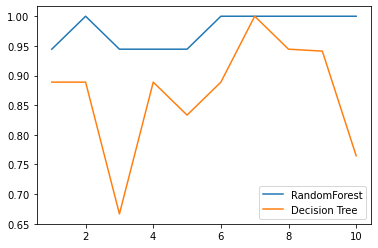

In [4]:
#看看交叉验证

from sklearn.model_selection import cross_val_score  
import matplotlib.pyplot as plt
%matplotlib inline
 
rfc = RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10)
 
clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf,wine.data,wine.target,cv=10)
 
plt.plot(range(1,11),rfc_s,label = "RandomForest")
plt.plot(range(1,11),clf_s,label = "Decision Tree")
plt.legend()
plt.show()


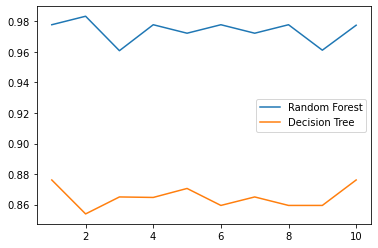

In [5]:

#看看十组交叉验证

rfc_l = []
clf_l = []
 
for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    rfc_l.append(rfc_s)
    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf,wine.data,wine.target,cv=10).mean()
    clf_l.append(clf_s)
    
plt.plot(range(1,11),rfc_l,label = "Random Forest")
plt.plot(range(1,11),clf_l,label = "Decision Tree")
plt.legend()
plt.show()



0.9888888888888889 36


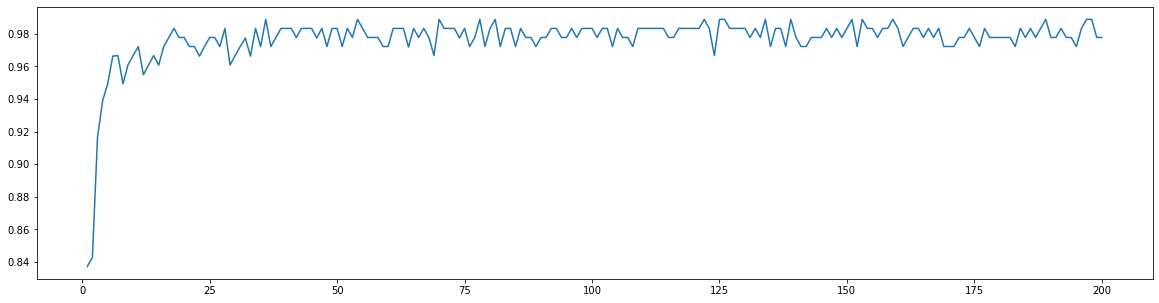

In [6]:

lc = []
for i in range(200):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1) #n_jobs=-1调用所有线程
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    lc.append(rfc_s)
    
    
print(max(lc),lc.index(max(lc))+1) #list.index(object)返回对象object在列表list中的索引
#最高精确度取值，max(lc))+1指的是森林数目的数量n_estimators

plt.figure(figsize=[20,5])
plt.plot(range(1,201),lc)
plt.show()


In [7]:
import numpy as np
from scipy.special import comb
 
np.array([comb(25,i)*(0.2**i)*((1-0.2)**(25-i)) for i in range(13,26)]).sum()

0.00036904803455582827

In [8]:
rfc = RandomForestClassifier(n_estimators=25,random_state=1912) 
rfc = rfc.fit(Xtrain, Ytrain)

#随机森林的重要属性：estimators，查看森林中树的状况rfc.estimators_
rfc.estimators_

for i in range(len(rfc.estimators_)):
    print(rfc.estimators_[i].random_state)

117950203
201178144
503906139
1228739663
73153489
1661720870
228037451
1490188506
784652302
2141674214
2088477697
1479387394
1205929206
966591396
1033677697
1594055707
1211756724
516201559
61065026
1360028511
381058307
255705120
1487449694
94740942
1965924537


In [9]:

#不划分训练集和测试集,用out of bag data作为测试数据
 
rfc = RandomForestClassifier(n_estimators=25,oob_score=True) #默认为False
rfc = rfc.fit(wine.data,wine.target)
 
#调用属性oob_score_
rfc.oob_score_   


0.9662921348314607

In [10]:
rfc = RandomForestClassifier(n_estimators = 25)
rfc = rfc.fit(Xtrain, Ytrain)
rfc.score(Xtest,Ytest)
 
rfc.feature_importances_             #结合zip可以对照特征名字查看特征重要性，参见节决策树模型
rfc.apply(Xtest)                     #apply返回每个测试样本所在的叶子节点的索引
rfc.predict(Xtest)                   #predict返回每个测试样本的分类/回归结果
rfc.predict_proba(Xtest)             #返回样本被分为某一类标签的概率

array([[0.08, 0.88, 0.04],
       [0.04, 0.92, 0.04],
       [0.  , 0.12, 0.88],
       [0.88, 0.08, 0.04],
       [0.84, 0.04, 0.12],
       [0.04, 0.32, 0.64],
       [0.04, 0.88, 0.08],
       [0.  , 0.  , 1.  ],
       [0.04, 0.12, 0.84],
       [0.08, 0.92, 0.  ],
       [0.  , 0.  , 1.  ],
       [0.24, 0.68, 0.08],
       [0.04, 0.96, 0.  ],
       [0.04, 0.96, 0.  ],
       [0.92, 0.08, 0.  ],
       [0.  , 1.  , 0.  ],
       [0.16, 0.64, 0.2 ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.96, 0.04, 0.  ],
       [0.28, 0.64, 0.08],
       [0.96, 0.  , 0.04],
       [1.  , 0.  , 0.  ],
       [0.  , 0.56, 0.44],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.96, 0.  , 0.04],
       [0.12, 0.84, 0.04],
       [0.  , 0.04, 0.96],
       [0.96, 0.04, 0.  ],
       [1.  , 0.  , 0.  ],
 

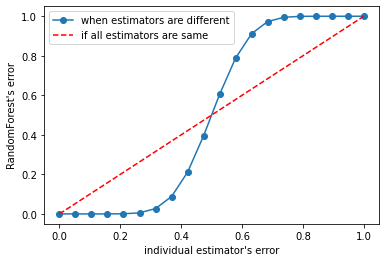

In [11]:

import numpy as np


x = np.linspace(0,1,20)
y = []
for epsilon in np.linspace(0,1,20):
    E = np.array([comb(25,i)*(epsilon**i)*((1-epsilon)**(25-i)) 
              for i in range(13,26)]).sum()
    y.append(E)
    
plt.plot(x,y,"o-",label="when estimators are different")
plt.plot(x,x,"--",color="red",label="if all estimators are same")
plt.xlabel("individual estimator's error") 
plt.ylabel("RandomForest's error")
plt.legend() 
plt.show()


## 随机森林回归器

In [12]:
from sklearn.datasets import load_boston            #波士顿房价数据集
from sklearn.model_selection import cross_val_score #导入交叉验证模块
from sklearn.ensemble import RandomForestRegressor  #导入随机森林回归器
 
boston = load_boston()

regressor = RandomForestRegressor(n_estimators=100,random_state=1912)#实例化
cross_val_score(regressor, boston.data, boston.target, cv=10
              ,scoring = "neg_mean_squared_error"                    #回归评估默认返回R方
               )


array([-10.72946229,  -5.4263958 ,  -5.18041631, -20.38411225,
       -11.63139124, -20.80252588,  -7.03354496, -96.152505  ,
       -29.16244692, -14.36342198])

In [13]:
#sklearn当中的模型评估指标（打分）列表

import sklearn
sorted(sklearn.metrics.SCORERS.keys())#这些指标是scoring可选择的参数


['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

## AdaBoost回归器

In [14]:


from sklearn.ensemble import AdaBoostRegressor as ABR       #AdaBoost回归器
from sklearn.ensemble import RandomForestRegressor as RFR   #随机森林回归器
from sklearn.linear_model import LinearRegression as LR     #线性回归
from sklearn.datasets import load_boston                    #波士顿房价数据
from sklearn.model_selection import KFold, cross_val_score as CVS, train_test_split as TTS 
from sklearn.metrics import mean_squared_error as MSE       #均方误差
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

data = load_boston()

x = data.data
y = data.target




In [15]:



Xtrain,Xtest,Ytrain,Ytest = TTS(x,y,test_size=0.3,random_state=1912) #以7：3划分训练集和测试集
 
reg = ABR(n_estimators=100).fit(Xtrain,Ytrain) #实例化化和训练模型

reg.predict(Xtest)                             #预测接口predict，返回样本预测值

reg.score(Xtest,Ytest)                         #评估接口score，想想这里返回的是什么？

MSE(Ytest,reg.predict(Xtest))                  #计算测试集的均方误差

reg.feature_importances_                       #特征重要性




array([0.01819776, 0.00058612, 0.00435627, 0.01122796, 0.02129446,
       0.28705697, 0.00884355, 0.17846501, 0.01944893, 0.04970046,
       0.02770435, 0.01992403, 0.35319413])

In [16]:

reg = ABR(n_estimators=100) 

CVS(reg,x,y,cv=5).mean()  #这里返回什么模型评估指标？

CVS(reg,x,y,cv=5,scoring='neg_mean_squared_error').mean()  

#对比随机森林和线性回归

rfr = RFR(n_estimators=100)
CVS(rfr,x,y,cv=5).mean()
CVS(rfr,x,y,cv=5,scoring='neg_mean_squared_error').mean()


lr = LR()
CVS(lr,x,y,cv=5).mean()
CVS(lr,x,y,cv=5,scoring='neg_mean_squared_error').mean()





-37.131807467699105

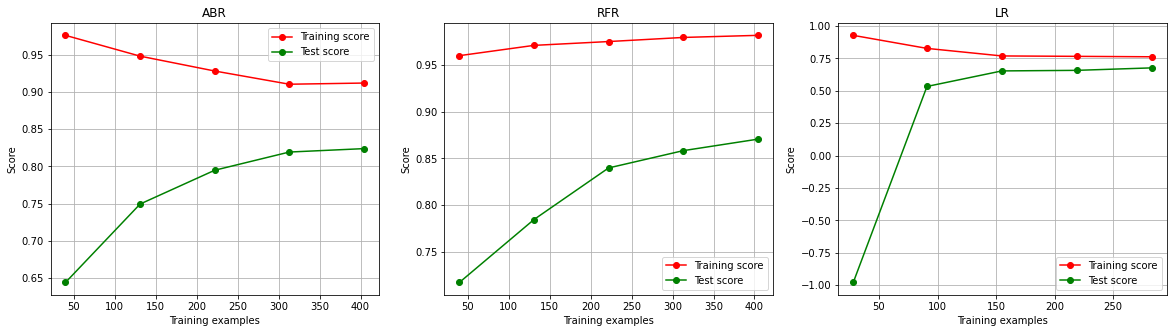

In [17]:


def plot_learning_curve(estimator,title, X, y,
                        ax=None, #选择子图
                        ylim=None, #设置纵坐标的取值范围
                        cv=None, #交叉验证
                        n_jobs=None #设定索要使用的线程
                       ):
    from sklearn.model_selection import learning_curve 
    import matplotlib.pyplot as plt
    import numpy as np
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y
                                                            ,shuffle=True
                                                            ,cv=cv
                                                         #   ,random_state=1912
                                                            ,n_jobs=n_jobs)
    if ax == None:
        ax = plt.gca() 
    else: 
        ax = plt.figure() 
    ax.set_title(title) 
    if ylim is not None:
        ax.set_ylim(*ylim) 
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score") 
    ax.grid() 
    ax.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r",label="Training score")
    ax.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g",label="Test score") 
    ax.legend(loc="best")
    return ax


cv = KFold(n_splits=5, shuffle = True, random_state=1912)

fig, ax = plt.subplots(1,3, figsize=(20,5))

plt.subplot(1,3,1)
plot_learning_curve(ABR(n_estimators=100,random_state=1912),"ABR",x,y,ax=None,cv=cv)
plt.subplot(1,3,2)
plot_learning_curve(RFR(n_estimators=100,random_state=1912),"RFR",x,y,ax=None,cv=cv)
plt.subplot(1,3,3)
plot_learning_curve(LR(),"LR",Xtrain,Ytrain,ax=None,cv=cv)
plt.show()





910 0.8237711240880315


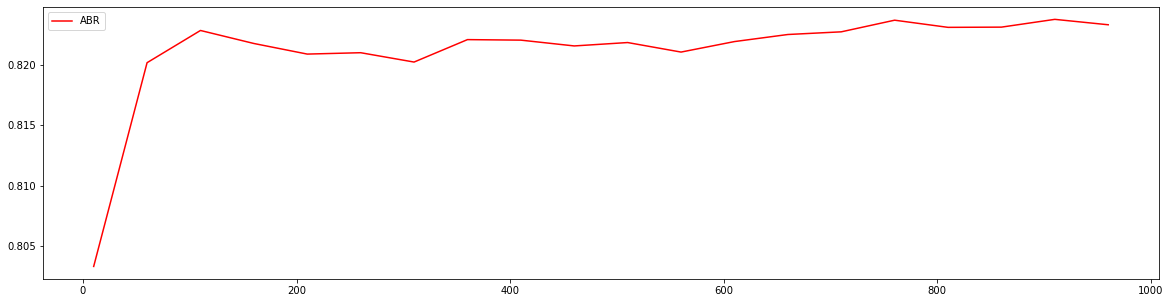

In [18]:




axisx = range(10,1010,50) 

rs = []
for i in axisx:
    reg = ABR(n_estimators=i,random_state=1912) 
    rs.append(CVS(reg,x,y,cv=cv).mean())

print(axisx[rs.index(max(rs))],max(rs))

plt.figure(figsize=(20,5)) 
plt.plot(axisx,rs,c="red",label="ABR") 
plt.legend()
plt.show()






In [19]:
boston.data.shape

(506, 13)

偏差最低时，迭代次数、偏差、方差:
 910 0.8237711240880315 0.002247054633274125
方差最低时，迭代次数、偏差、方差:
 210 0.8208949532928879 0.001873347716552349
泛化误差最低时，迭代次数、偏差、方差:
 110 0.8228506968660371 0.0019019961927344967 0.033283871793583185


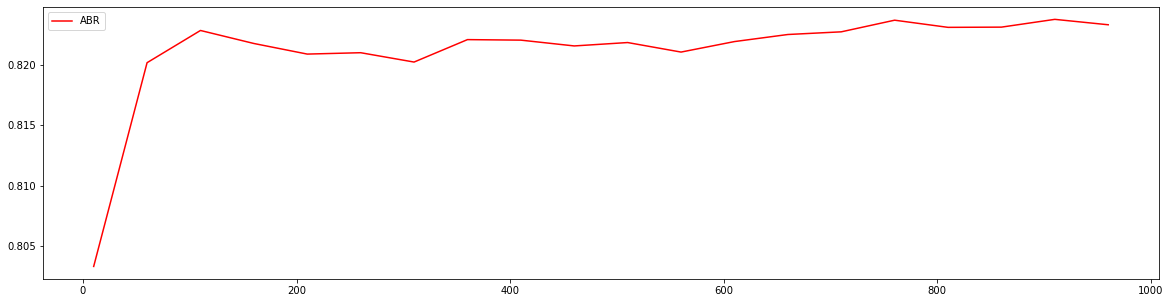

In [20]:
axisx = range(10,1010,50) 
rs = []
var = []
ge = []
for i in axisx:
    reg = ABR(n_estimators=i,random_state=1912) 
    cvresult = CVS(reg,x,y,cv=cv)
    #记录1-偏差
    rs.append(cvresult.mean()) 
    #记录方差
    var.append(cvresult.var()) 
    #计算泛化误差的可控部分
    ge.append((1 - cvresult.mean())**2+cvresult.var()) 
#打印R2最高所对应的参数取值，并打印这个参数下的方差
print('偏差最低时，迭代次数、偏差、方差:''\n',
      axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])  
#打印方差最低时对应的参数取值，并打印这个参数下的R2
print('方差最低时，迭代次数、偏差、方差:''\n',
      axisx[var.index(min(var))],rs[var.index(min(var))],min(var)) 
#打印泛化误差可控部分的参数取值，并打印这个参数下的R2，方差以及泛化误差的可控部分
print('泛化误差最低时，迭代次数、偏差、方差:''\n',
      axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge)) 
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="red",label="ABR")
plt.legend()
plt.show()

偏差最低时，迭代次数、偏差、方差:
 40 0.8293089930467783 0.0028724208033217304
方差最低时，迭代次数、偏差、方差:
 140 0.8223920946922909 0.0017928847017193925
泛化误差最低时，迭代次数、偏差、方差:
 40 0.8293089930467783 0.0028724208033217304 0.03200784065802651


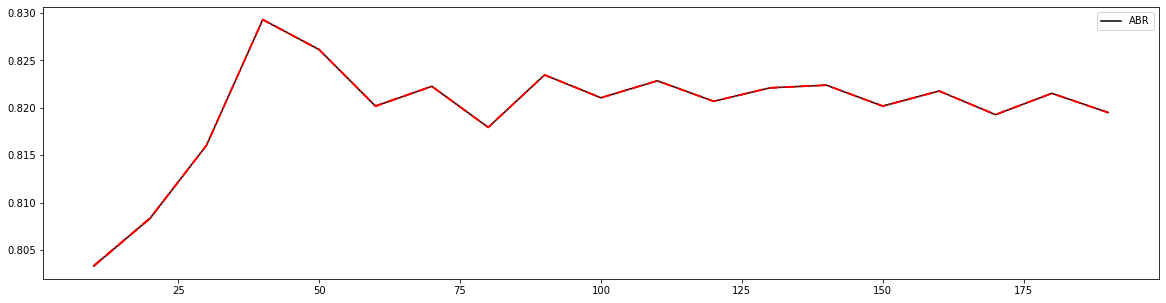

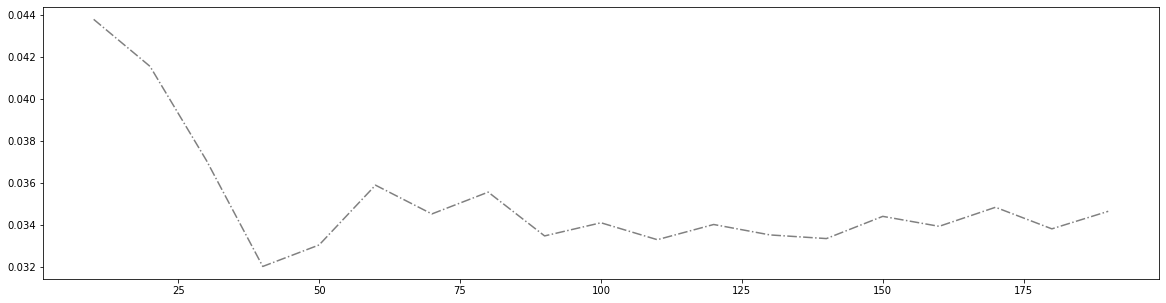

In [21]:



axisx = range(10,200,10) 
rs = []
var = []
ge = []
for i in axisx:
    reg = ABR(n_estimators=i,random_state=1912) 
    cvresult = CVS(reg,x,y,cv=cv)
    rs.append(cvresult.mean()) 
    var.append(cvresult.var())
    ge.append((1 - cvresult.mean())**2+cvresult.var())

print('偏差最低时，迭代次数、偏差、方差:''\n',
      axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])  
print('方差最低时，迭代次数、偏差、方差:''\n',
      axisx[var.index(min(var))],rs[var.index(min(var))],min(var)) 
print('泛化误差最低时，迭代次数、偏差、方差:''\n',
      axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge)) 
rs = np.array(rs)
var = np.array(var)*0.01
plt.figure(figsize=(20,5)) 
plt.plot(axisx,rs,c="black",label="ABR") #添加方差线
plt.plot(axisx,rs+var,c="red",linestyle='-.') 
plt.plot(axisx,rs-var,c="red",linestyle='-.')
plt.legend()
plt.show()

# 泛化误差的可控部分
plt.figure(figsize=(20,5)) 
plt.plot(axisx,ge,c="gray",linestyle='-.')
plt.show()





In [23]:
from time import time
import datetime

time0 = time()
print(ABR(n_estimators=910,random_state=1912).fit(Xtrain,Ytrain).score(Xtest,Ytest)) 
print(time()-time0)

time0 = time()
print(ABR(n_estimators=140,random_state=1912).fit(Xtrain,Ytrain).score(Xtest,Ytest)) 
print(time()-time0)

time0 = time()
print(ABR(n_estimators=40,random_state=1912).fit(Xtrain,Ytrain).score(Xtest,Ytest)) 
print(time()-time0)


0.7953526290847804
2.716723918914795
0.7984818348217619
0.40778231620788574
0.7883318584400658
0.11650967597961426
